In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('netflix_titles.csv')


In [20]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# --- Data Cleaning ---
# Fill missing values for key categorical columns
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Drop rows with missing date_added or rating as they are few
df.dropna(subset=['date_added', 'rating'], inplace=True)

# Convert date_added to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Separate movies and TV shows for duration analysis
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# ---- FIX IS HERE ----
# Drop rows where 'duration' is missing BEFORE converting to numeric
movies.dropna(subset=['duration'], inplace=True)
tv_shows.dropna(subset=['duration'], inplace=True)

# Clean and convert duration to numeric
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)



C:\Users\ARCHIT\AppData\Local\Temp\ipykernel_20220\704350700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


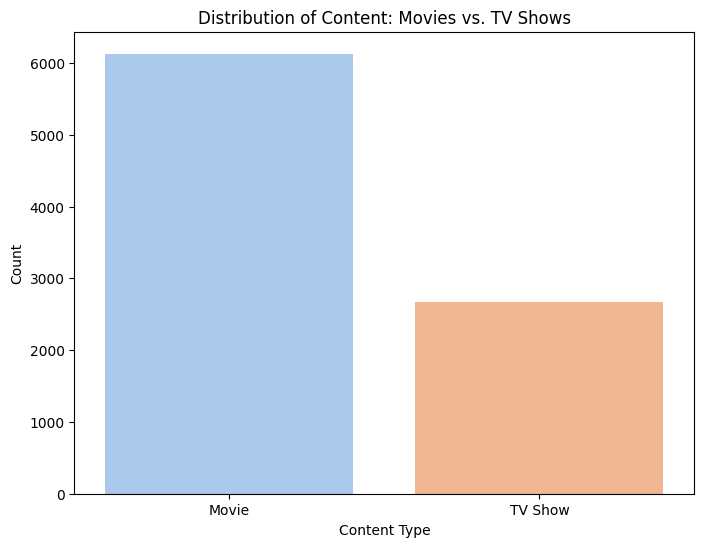

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Distribution of Content: Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

C:\Users\ARCHIT\AppData\Local\Temp\ipykernel_20220\2284243180.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_countries.index, x=top_10_countries.values, orient='h', palette='viridis')


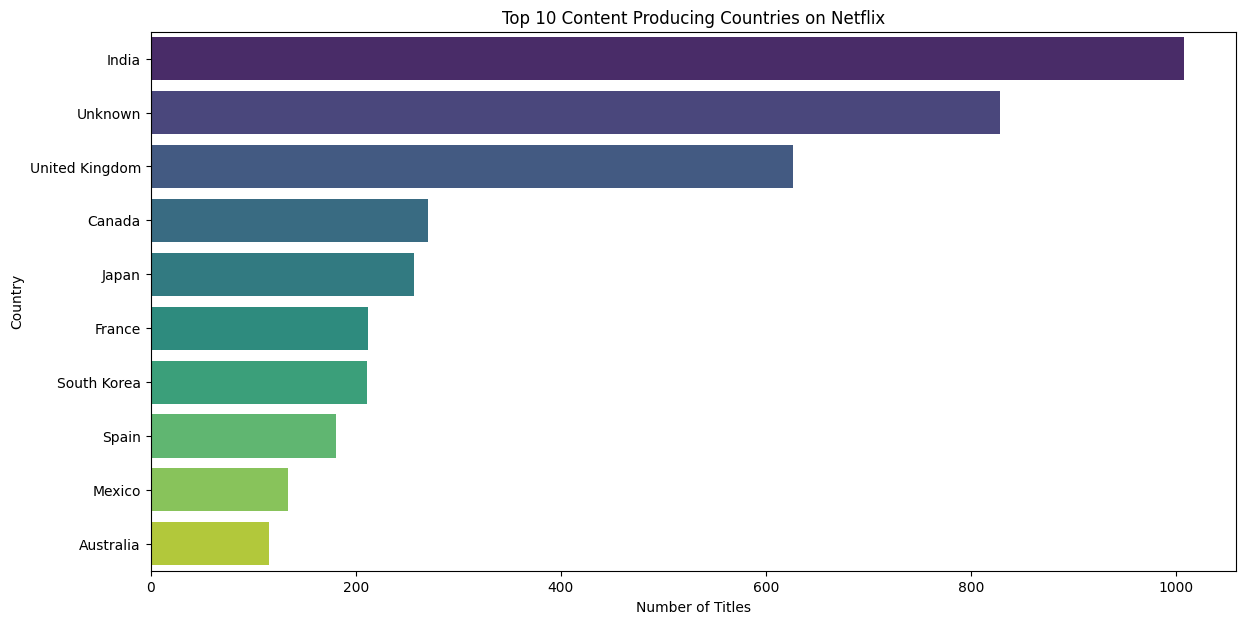

In [24]:
# We'll consider the first country listed for simplicity
top_countries = df['country'].apply(lambda x: x.split(',')[0]).value_counts()
top_10_countries = top_countries[1:11] # Exclude 'Unknown'

plt.figure(figsize=(14, 7))
sns.barplot(y=top_10_countries.index, x=top_10_countries.values, orient='h', palette='viridis')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

C:\Users\ARCHIT\AppData\Local\Temp\ipykernel_20220\4279124402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tv_shows[tv_shows['seasons'] <= 10], x='seasons', palette='rocket')


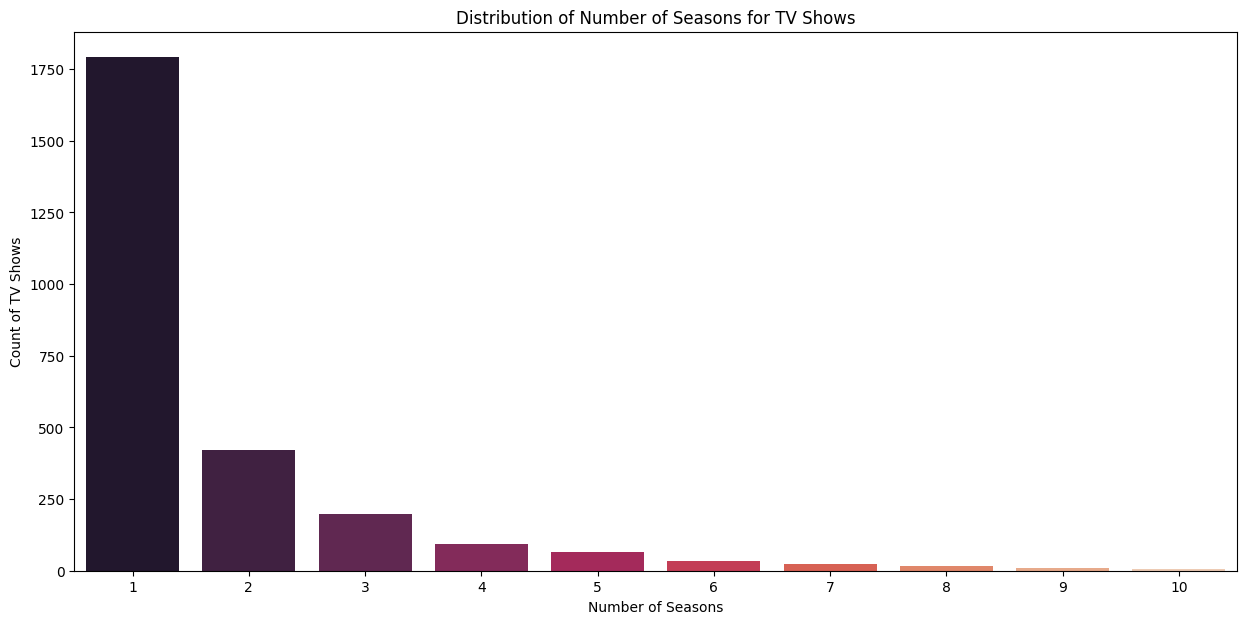

In [28]:
plt.figure(figsize=(15, 7))
# Limiting to shows with 10 or fewer seasons for better readability
sns.countplot(data=tv_shows[tv_shows['seasons'] <= 10], x='seasons', palette='rocket')
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')
plt.show()

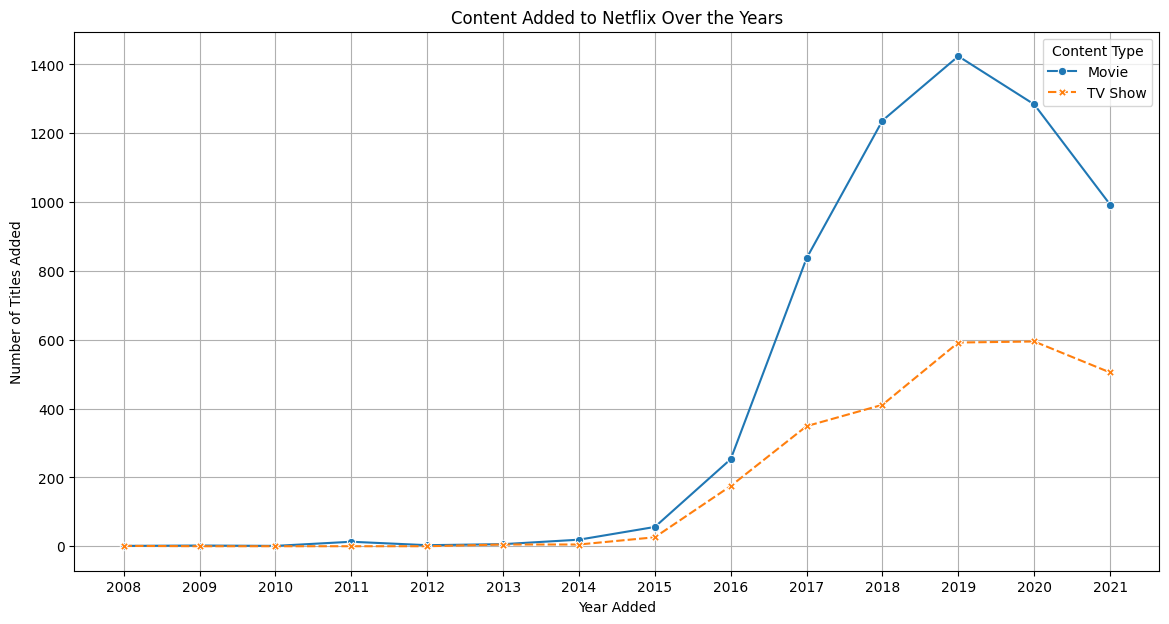

In [30]:
content_by_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
sns.lineplot(data=content_by_year, markers=True)
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.xticks(content_by_year.index)
plt.grid(True)
plt.show()

C:\Users\ARCHIT\AppData\Local\Temp\ipykernel_20220\136538589.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=recent_movies, x='decade', y='duration_min', palette='muted')


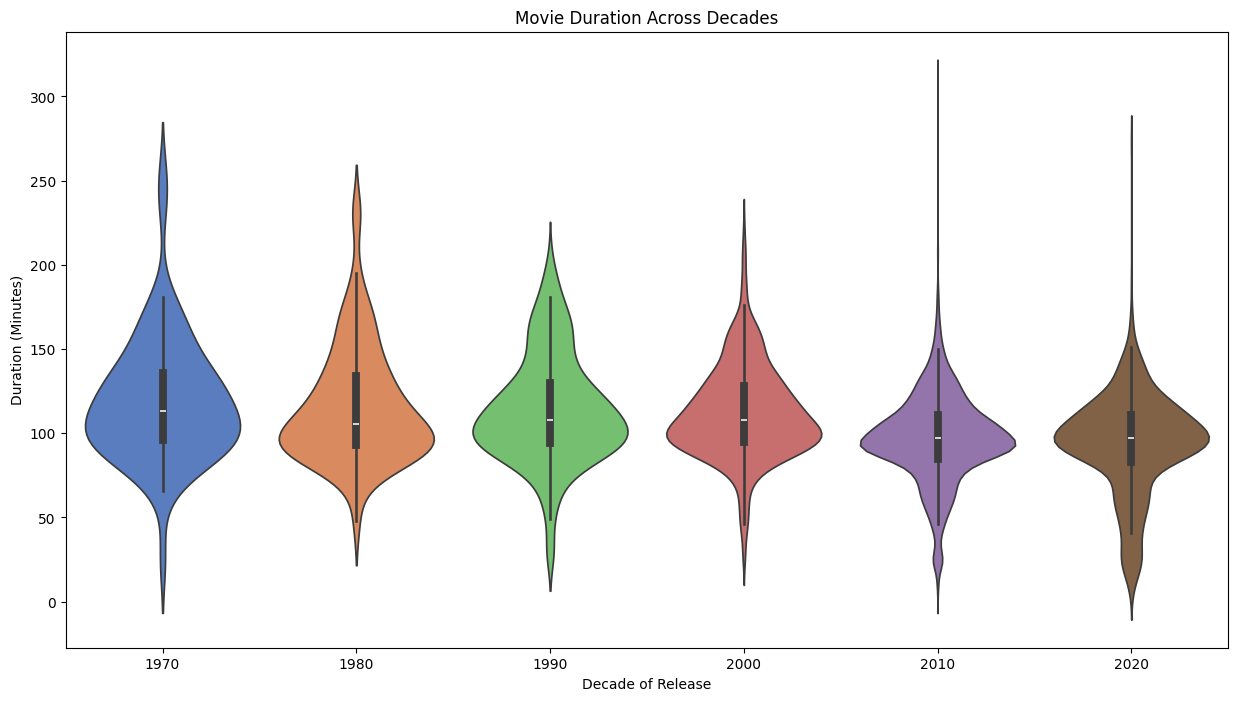

In [32]:
# Create decades from release_year
movies['decade'] = (movies['release_year'] // 10) * 10
# Filter for more recent decades with more data
recent_movies = movies[movies['decade'] >= 1970]

plt.figure(figsize=(15, 8))
sns.violinplot(data=recent_movies, x='decade', y='duration_min', palette='muted')
plt.title('Movie Duration Across Decades')
plt.xlabel('Decade of Release')
plt.ylabel('Duration (Minutes)')
plt.show()